# オートエンコーダーとは

#### オートエンコーダーは与えられた画像群を自動的に圧縮及び復元を行うものである。オートエンコーダーが行う圧縮は非可逆圧縮であるため、復元された画像は多少粗くなっている。オートエンコーダーの実用的な用途は,データのノイズ除去とデータの視覚化に応用できる次元削減がある。視覚化においてはt-SNEの方が性能が良いらしい。

# オートエンコーダーを作る(MNIST)

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.3558 - val_loss: 0.2697
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2616 - val_loss: 0.2504
Epoch 3/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.2413 - val_loss: 0.2293
Epoch 4/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2211 - val_loss: 0.2108
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2058 - val_loss: 0.1985
Epoch 6/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1950 - val_loss: 0.1890
Epoch 7/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1868 - val_loss: 0.1815
Epoch 8/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1797 - val_loss: 0.1750
Epoch 9/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.173

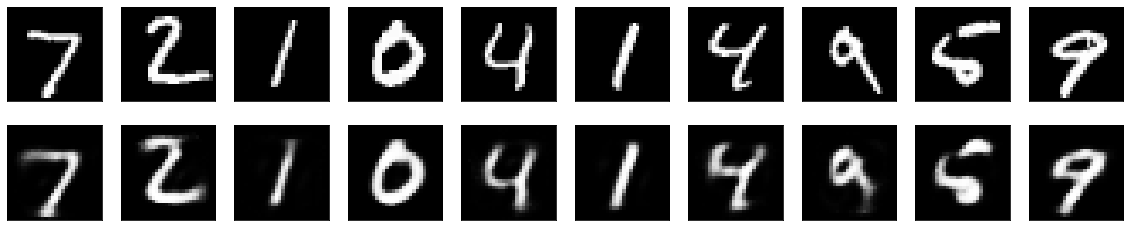

In [21]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32 #エンコードする次元を決めている
input_img = Input(shape=(784,))# MNISTは32*32=784次元なのでそれに合わせる
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded) #オートエンコーダーのモデルの入力、出力
encoder = Model(input_img, encoded)#エンコーダーのモデルの入力、出力
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))#デコーダーのモデルの入力、出力
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')#最適化関数をadadeltaに、損失関数をクロスエントロピーにする
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train,x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))
encoded_imgs = encoder.predict(x_test)#x_testに対する予測値を出力
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
 # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#### エンコーダー部分、デコーダー部分共に全結合層一層の簡単なモデルである。上の行の画像が入力画像で下の行の画像は出力画像である。ぼやけてはいるものの、ちゃんと復元できている

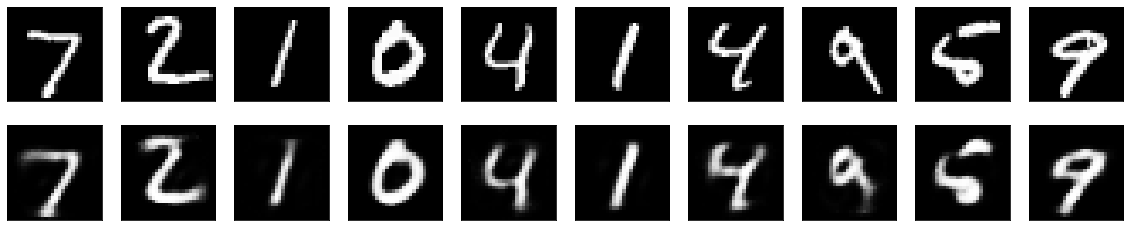

In [22]:
from keras import regularizers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 正規化を行うオートエンコーダー。出力画像で見比べるとあまり変化がないように見える。もっと複雑なデータだと効果が現れるのだと思う

# Deep autoencoder

In [19]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64,activation='relu')(encoded)
encoded = Dense(32,activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

autoencoder.fit(x_train,x_train,epochs=100,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 123us/step - loss: 0.3162 - val_loss: 0.2619
Epoch 2/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.2510 - val_loss: 0.2367
Epoch 3/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.2288 - val_loss: 0.2211
Epoch 4/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2131 - val_loss: 0.2034
Epoch 5/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2011 - val_loss: 0.1972
Epoch 6/100
60000/60000 [==============================] - 7s 109us/step - loss: 0.1922 - val_loss: 0.1871
Epoch 7/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.1832 - val_loss: 0.1777
Epoch 8/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1777 - val_loss: 0.1732
Epoch 9/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.1723 - val_los

60000/60000 [==============================] - 5s 87us/step - loss: 0.1054 - val_loss: 0.1059
Epoch 77/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.1053 - val_loss: 0.1067
Epoch 78/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.1051 - val_loss: 0.1057
Epoch 79/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.1049 - val_loss: 0.1037
Epoch 80/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1048 - val_loss: 0.1039
Epoch 81/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1046 - val_loss: 0.1032: 0.10
Epoch 82/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1043 - val_loss: 0.1038
Epoch 83/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1043 - val_loss: 0.1044
Epoch 84/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1042 - val_loss: 0.1031
Epoch 85/100
60000/60000 [===============

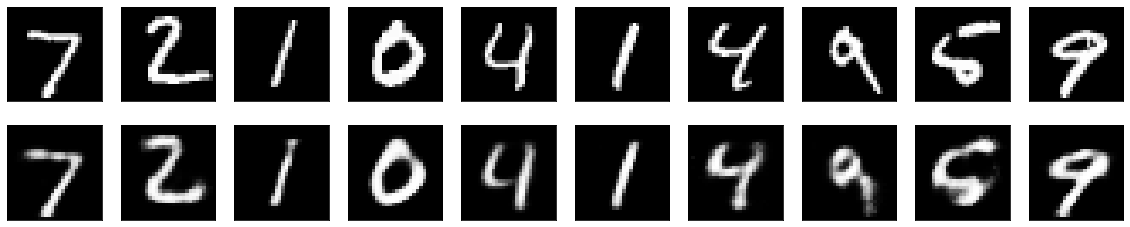

In [20]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 全結合層を複数備えたディープなオートエンコーダ。単層のオートエンコーダと比べて、ぼやけている部分が少なくなり、くっきりしている。

# Convolutional autoencoder

## 全結合層ではなく、畳み込み層やプーリング層で構成されたオートエンコーダー

In [14]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28,28,1))

x = Conv2D(16,(3,3), activation='relu',padding='same')(input_img)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

x = Conv2D(8,(3,3), activation='relu',padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded =Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
decoded_imgs = autoencoder.predict(x_test)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2111 - val_loss: 0.1711
Epoch 2/50
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1558 - val_loss: 0.1478
Epoch 3/50
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1397 - val_loss: 0.1338
Epoch 4/50
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1311 - val_loss: 0.1260
Epoch 5/50
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1258 - val_loss: 0.1230
Epoch 6/50
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1223 - val_loss: 0.1194
Epoch 7/50
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1199 - val_loss: 0.1162
Epoch 8/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1178 - val_loss: 0.1168
Epoch 9/50
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1163 - val_loss: 0.1128
Epoch

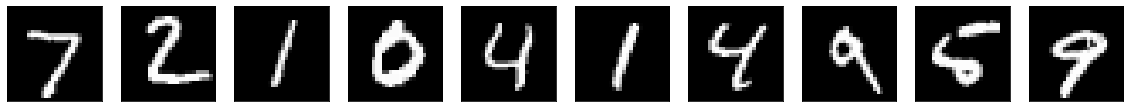

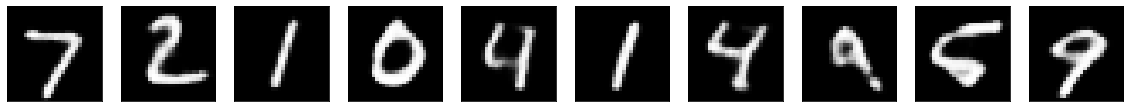

In [15]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

n = 10
plt.figure(figsize=(20,8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 画像のデータを一次元配列としてみるのではなく、2次元配列として捉えることで、画素同士の位置関係も学習できる。そのためか、全結合層のみのこれまでのオートエンコーダよりもよく復元できている（右から3番目の9とか）

# Application to image denoising

#### ノイズのある画像を復元することもできる

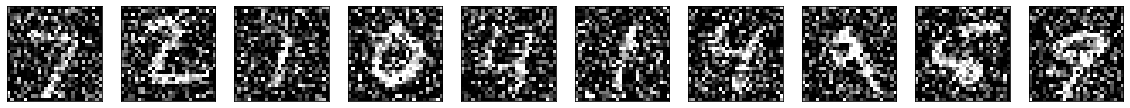

In [31]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
(x_train, _), (x_test,_) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)#画像にノイズを加えている

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 画像セットにノイズを乗せた

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 134s 2ms/step - loss: 0.1882 - val_loss: 0.1222
Epoch 2/50
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1196 - val_loss: 0.1156
Epoch 3/50
60000/60000 [==============================] - 136s 2ms/step - loss: 0.1119 - val_loss: 0.1063
Epoch 4/50
60000/60000 [==============================] - 136s 2ms/step - loss: 0.1080 - val_loss: 0.1086
Epoch 5/50
60000/60000 [==============================] - 134s 2ms/step - loss: 0.1057 - val_loss: 0.1048
Epoch 6/50
60000/60000 [==============================] - 134s 2ms/step - loss: 0.1044 - val_loss: 0.1035
Epoch 7/50
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1035 - val_loss: 0.1033
Epoch 8/50
60000/60000 [==============================] - 136s 2ms/step - loss: 0.1024 -

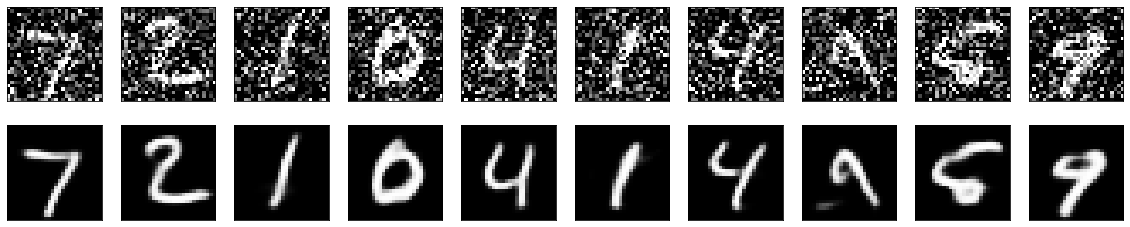

In [2]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as K
%matplotlib inline
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                )
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 上の行の画像が入力画像であり、ノイズが乗っている。下の行がオートエンコーダからの出力画像であり、ノイズが綺麗に除去されている。
#### ノイズのない画像で学習を行うことにより、ノイズのある画像が入力されても、ノイズのない画像を出力することができる

# Variational autoencoder

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

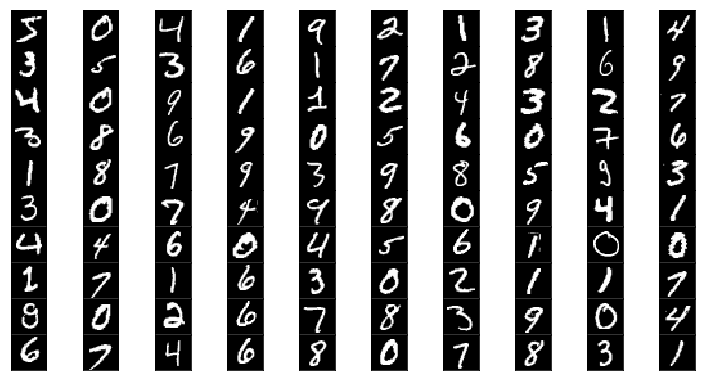

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.01, wspace=0.01)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')


K.clear_session()

img_shape = (28, 28, 1)
epochs = 10
batch_size = 256
latent_dim = 2  # 潜在空間の次元

input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = Model(input_img,z)

decoder_input = layers.Input(K.int_shape(z)[1:])

x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

x = layers.Reshape(shape_before_flattening[1:])(x)

x = layers.Conv2DTranspose(32, 3,
                           padding='same', activation='relu',
                           strides=(2, 2))(x)
x = layers.Conv2D(1, 3,
                  padding='same', activation='sigmoid')(x)
decoder = Model(decoder_input, x)

z_decoded = decoder(z)
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(
            1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        # We don't use this output.
        return x
    
y = CustomVariationalLayer()([input_img, z_decoded])
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()
history = vae.fit(x=x_train, y=None,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))
loss = history.history['loss']
val_loss = history.history['val_loss']

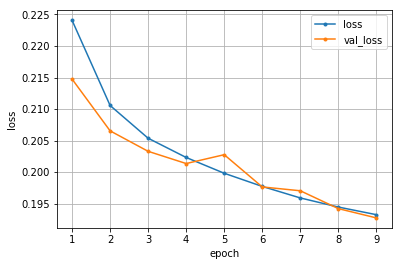

In [3]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1,epochs), loss[1:], marker='.', label='loss')
plt.plot(range(1,epochs), val_loss[1:], marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### エポック数が進むにつれ順調にロスが減っている

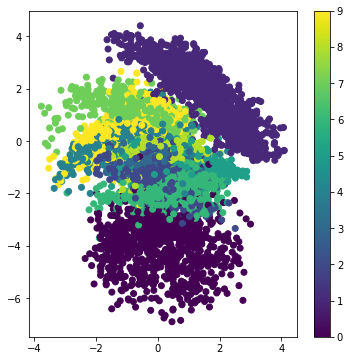

In [6]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1],c=y_test)
plt.colorbar()
plt.show()

#### 潜在空間にそれぞれのクラスがマッピングされている。同じクラスの点が近い場所にプロットされている。

[[-1.02329018 -0.05848644]
 [-0.62064688 -0.48115805]
 [ 1.41770479 -0.42594301]
 [ 1.29395701  0.41774317]
 [ 0.07493471  0.77358353]
 [ 0.68997928  0.95579888]
 [-0.82287777  0.00213481]
 [ 0.59728415  1.59164083]
 [ 1.3996798   0.22505744]
 [ 1.15990079  1.37781154]]


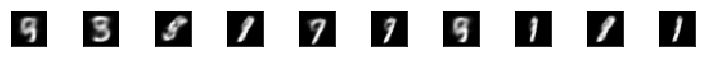

In [7]:
n=10
a = np.random.normal(0,1,(n,2))
print(a)
x_decoded = decoder.predict(a, batch_size=batch_size)
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.01, wspace=0.01)
for i in range(n):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_decoded[i].reshape((28, 28)), cmap='gray')

#### 潜在空間に任意の値を入れることで、画像を生成できるようになった

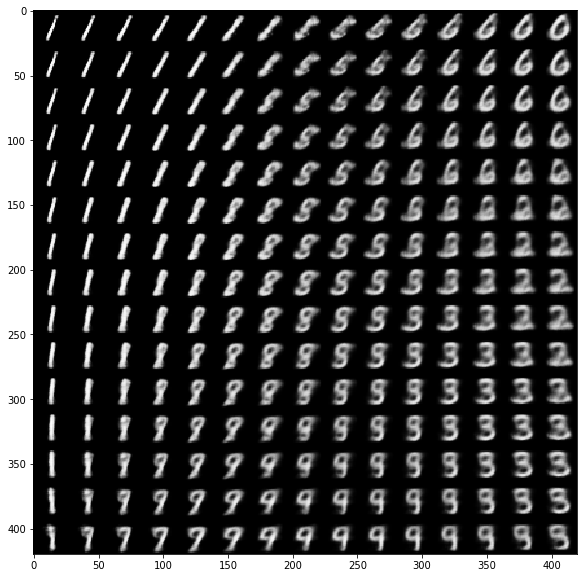

In [7]:
from scipy.stats import norm

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

#### 潜在空間の一部を画像として表示した。各数字が少しづつ別の数字へとモーフィングしている様子がわかる

# fashion mnistにオートエンコーダー

## 全結合層のみのオートエンコーダーを適用

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.5284 - val_loss: 0.4600
Epoch 2/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.4251 - val_loss: 0.4061
Epoch 3/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.3957 - val_loss: 0.3881
Epoch 4/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.3784 - val_loss: 0.3719
Epoch 5/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.3636 - val_loss: 0.3592s: 0.36
Epoch 6/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.3525 - val_loss: 0.3498
Epoch 7/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.3443 - val_loss: 0.3428
Epoch 8/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.3379 - val_loss: 0.3371
Epoch 9/50
60000/60000 [==============================] - 5s 78us/step - los

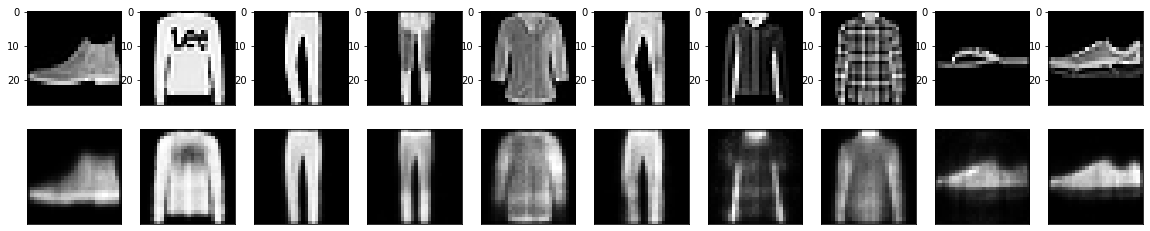

In [23]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train,x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

from keras import regularizers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

#### 全結合層で構成されたオートエンコーダーにfashion mnist を入力として与えた。服の模様など細部は欠落してしまっているが、服の輪郭は捉えられており、ズボンであるかシャツであるかなどは見分けがつく

## fashion MNISTでVAE

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

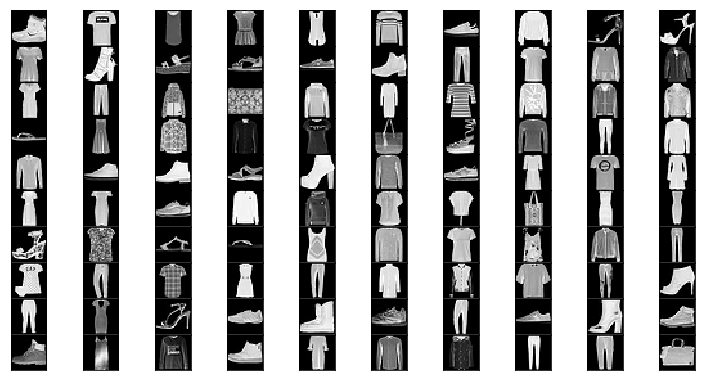

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
y_color = y_test
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.01, wspace=0.01)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')


K.clear_session()

img_shape = (28, 28, 1)
epochs = 10
batch_size = 256
latent_dim = 2  # Dimensionality of the latent space: a plane

input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = Model(input_img,z)

decoder_input = layers.Input(K.int_shape(z)[1:])

x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

x = layers.Reshape(shape_before_flattening[1:])(x)

x = layers.Conv2DTranspose(32, 3,
                           padding='same', activation='relu',
                           strides=(2, 2))(x)
x = layers.Conv2D(1, 3,
                  padding='same', activation='sigmoid')(x)
decoder = Model(decoder_input, x)

z_decoded = decoder(z)
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(
            1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        # We don't use this output.
        return x

y = CustomVariationalLayer()([input_img, z_decoded])
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()
history = vae.fit(x=x_train, y=None,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))
loss = history.history['loss']
val_loss = history.history['val_loss']

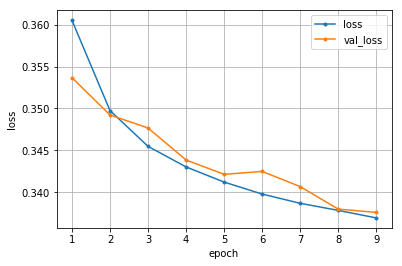

In [2]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1,epochs), loss[1:], marker='.', label='loss')
plt.plot(range(1,epochs), val_loss[1:], marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


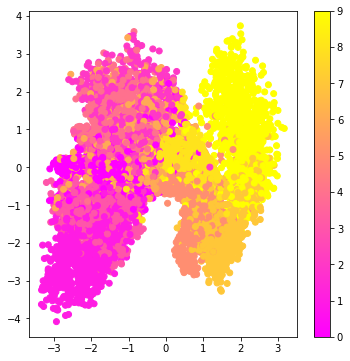

In [29]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_color,cmap="spring")
print(y_test)
plt.colorbar()
plt.show()

#### 0～9に対応するクラスはそれぞれ'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'である

#### Tシャツとドレス、コートなど似た形をしたものは近くに分布しており、Tシャツとブーツのように似ていないものは遠くに配置されている。この図だと右側は靴やカバンなどの小物系が分布しており、左側がシャツなどの衣服が分布している

[[ 0.46911887 -0.50961394]
 [-1.78728335  1.01933206]
 [-0.23590481  1.00220642]
 [-0.99371718  1.39118855]
 [-0.72300895  0.27529198]
 [-0.5716637   1.30619708]
 [ 1.27986159 -0.33135686]
 [-2.16055531 -1.52049803]
 [-1.33086667  0.11732782]
 [ 0.09656912 -0.32163829]]


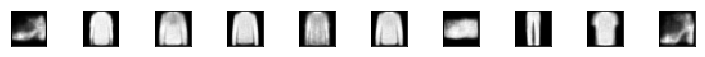

In [30]:
n=10
a = np.random.normal(0,1,(n,2))
print(a)
x_decoded = decoder.predict(a, batch_size=batch_size)
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.01, wspace=0.01)
for i in range(n):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_decoded[i].reshape((28, 28)), cmap='gray')

#### 服の画像も出力できる

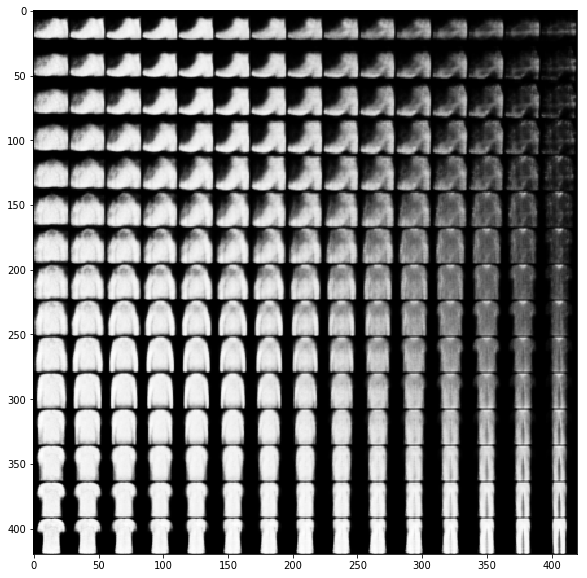

In [3]:
from scipy.stats import norm

n = 15 
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

#### 衣服のデータでも潜在空間に落とし込むことができている。ある衣服から別の衣服へと徐々にモーフィングしている様子がわかる

# CIFAR10に対してオートエンコーダーを構築

## 全結合層のみのオートエンコーダーでCIFAR10を学習

(50000, 3072)
(10000, 3072)
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 302us/step - loss: 0.6930 - val_loss: 0.6925
Epoch 2/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.6906 - val_loss: 0.6870
Epoch 3/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.6825 - val_loss: 0.6788
Epoch 4/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.6772 - val_loss: 0.6752
Epoch 5/50
50000/50000 [==============================] - 9s 190us/step - loss: 0.6728 - val_loss: 0.6697
Epoch 6/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.6668 - val_loss: 0.6639
Epoch 7/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.6612 - val_loss: 0.6583
Epoch 8/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.6558 - val_loss: 0.6535
Epoch 9/50
50000/50000 [==============================] - 10s 191us

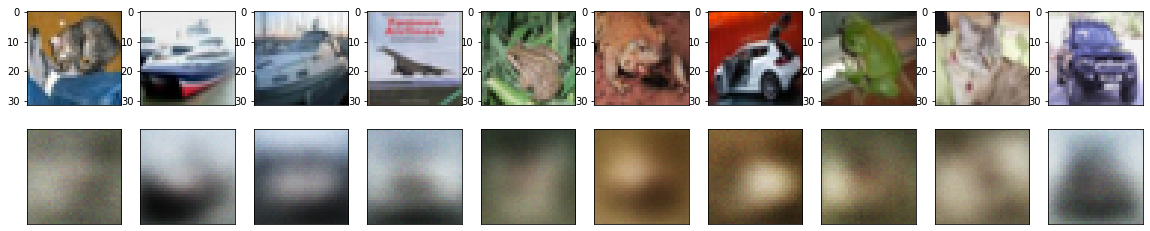

In [12]:
from keras.layers import Input, Dense
from keras.models import Model
import keras
encoding_dim = 32 #エンコードする次元を決めている
input_img = Input(shape=(3072,))# MNISTは32*32=784次元なのでそれに合わせる
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train,x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#### カラー画像であるCIFAR10を全結合層のオートエンコーダーに入力した。RGBの3チャンネル×1024画素の画像を1次元配列として扱うため、色の情報が欠落している場所が多い。しかし物体の輪郭は捉えられている

## Convolutional autoencoderでCIFAR10を学習

In [13]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as K
import keras
input_img = Input(shape=(32,32,3))

x = Conv2D(16,(3,3), activation='relu',padding='same')(input_img)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

x = Conv2D(8,(3,3), activation='relu',padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded =Conv2D(3,(3,3),activation='sigmoid',padding='same')(x)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format
from keras.callbacks import TensorBoard
autoencoder.summary()
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                )
decoded_imgs = autoencoder.predict(x_test)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

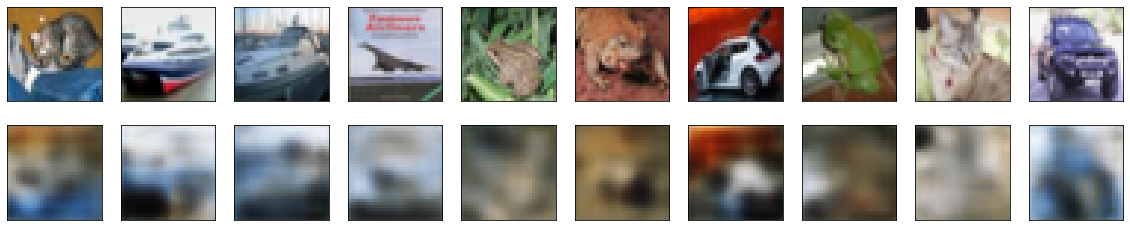

In [16]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### モデルを畳み込み層で構築することで、全結合層の時と比べ色の情報もきちんと残るようになっており、性能が上がっているといえる。